<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/DL-SatelliteImagery/Satellite_Imagery_DeepLearning-LocalDiag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code from Part 1 - data preprocessing



In [ ]:
!pip install patchify rasterio


In [ ]:
import rasterio
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/data_hackaton/data'
px = 256

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
# faiseur de pairs
def load_raster_mask_pairs(raster_dir, mask_dir):
    """
    Charge les rasters et leurs masques correspondants.

    Args:
        raster_dir (str): Chemin du dossier contenant les sous-rasters
        mask_dir (str): Chemin du dossier contenant les sous-masques

    Returns:
        tuple: (raster_dataset, mask_dataset) au format numpy
    """
    # Lister les fichiers de rasters et de masques
    raster_files = sorted([f for f in os.listdir(raster_dir) if f.endswith('.tif')])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.tif')])
    #raster_files = sorted([f for f in os.listdir(raster_dir) if f.endswith('.tif') ])
    #mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.tif')])
    # Initialiser des listes pour stocker les données
    raster_dataset = []
    mask_dataset = []
    #and not f.startswith('BALELE')

    # Parcourir les fichiers en parallèle
    for raster_file, mask_file in zip(raster_files, mask_files):
        # Chemins complets
        raster_path = os.path.join(raster_dir, raster_file)
        mask_path = os.path.join(mask_dir, mask_file)

        # Ouvrir le raster
        with rasterio.open(raster_path) as src_raster:
            # Lire toutes les bandes du raster
            raster_data = src_raster.read()
            raster_dataset.append(raster_data)

        # Ouvrir le masque
        with rasterio.open(mask_path) as src_mask:
            # Lire le masque (qui est généralement mono-bande)
            mask_data = src_mask.read()

            # # S'assurer que le masque est mono-bande
            # if mask_data.ndim > 2:
            #     mask_data = mask_data[0]

            mask_dataset.append(mask_data)

    # Convertir les listes en numpy arrays
    raster_dataset = np.array(raster_dataset)
    mask_dataset = np.array(mask_dataset)

    return raster_dataset, mask_dataset

In [ ]:
# import concurrent.futures

# def load_raster_mask_pairs(raster_dir, mask_dir):
#     # Utiliser glob pour une recherche plus rapide
#     import glob

#     # Recherche rapide des fichiers
#     raster_files = sorted(glob.glob(os.path.join(raster_dir, '*.tif')))
#     mask_files = sorted(glob.glob(os.path.join(mask_dir, '*.tif')))

#     # Filtrer après la recherche (potentiellement plus rapide)
#     raster_files = [f for f in raster_files if not os.path.basename(f).startswith('BALELE')]
#     mask_files = [f for f in mask_files if not os.path.basename(f).startswith('BALELE')]

#     def load_raster(raster_path):
#         with rasterio.open(raster_path) as src_raster:
#             return src_raster.read()

#     def load_mask(mask_path):
#         with rasterio.open(mask_path) as src_mask:
#             return src_mask.read()

#     # Chargement parallèle
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         # Chemins complets
#         raster_paths = [os.path.join(raster_dir, f) for f in raster_files]
#         mask_paths = [os.path.join(mask_dir, f) for f in mask_files]

#         # Charger en parallèle
#         raster_futures = [executor.submit(load_raster, path) for path in raster_paths]
#         mask_futures = [executor.submit(load_mask, path) for path in mask_paths]

#         # Récupérer les résultats
#         raster_dataset = [future.result() for future in raster_futures]
#         mask_dataset = [future.result() for future in mask_futures]

#     # Convertir en numpy arrays
#     return np.array(raster_dataset), np.array(mask_dataset)

In [144]:
# Application
# Chemins à ajuster selon votre structure de dossiers
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/data_hackaton/data'
raster_dir = os.path.join(dataset_root_folder, 'raster')
mask_dir = os.path.join(dataset_root_folder, 'mask')

# Charger les données
raster_dataset, mask_dataset = load_raster_mask_pairs(raster_dir, mask_dir)

# Afficher quelques informations sur les datasets
print("Raster dataset shape:", raster_dataset.shape)
print("Mask dataset shape:", mask_dataset.shape)

# Optionnel : Sauvegarder les datasets
#np.save(os.path.join(output_base_path, 'raster_dataset.npy'), raster_dataset)
#np.save(os.path.join(output_base_path, 'mask_dataset.npy'), mask_dataset)

Raster dataset shape: (1483, 1, 256, 256)
Mask dataset shape: (1483, 1, 256, 256)


In [ ]:
# dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/data_hackaton/data'
# raster_dir = os.path.join(dataset_root_folder, 'raster')
# mask_dir = os.path.join(dataset_root_folder, 'mask')

# # Récupérer la liste des fichiers du dossier
# raster_files = os.listdir(raster_dir)

# # Prendre le premier fichier
# first_raster_file = raster_files[0]
# full_raster_path = os.path.join(raster_dir, first_raster_file)

# # Ouvrir le premier fichier raster
# with rasterio.open(full_raster_path) as src_raster:
#     # Lire toutes les bandes du raster
#     raster_data = src_raster.read()
#     colormap = src_raster.colormap(1)




In [145]:
#raster_dataset = raster_dataset.squeeze(axis=1)
#mask_dataset = mask_dataset.squeeze(axis=1)
raster_dataset = np.transpose(raster_dataset, (0, 2, 3, 1))
mask_dataset = np.transpose(mask_dataset, (0, 2, 3, 1))
print("Raster dataset shape:", raster_dataset.shape)

Raster dataset shape: (1483, 256, 256, 1)


In [146]:
raster_dataset[0,:,:]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint16)

In [147]:
mask_dataset[1,:,:]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
def normalize_rasters(raster_dataset):
   """
   Normalise les valeurs en utilisant le min et max globaux.

   Args:
       raster_dataset (numpy.ndarray): Tableau de forme (1490, 1, 1024, 1024)

   Returns:
       numpy.ndarray: Raster dataset normalisé
   """
   # Convertir en float32 pour l'efficacité mémoire
   normalized_dataset = raster_dataset.astype(np.float32)

   # Calculer le min et max globaux sur toutes les images
   global_min = normalized_dataset.min()
   global_max = normalized_dataset.max()

   # Normaliser avec le min et max globaux
   if global_min != global_max:
       normalized_dataset -= global_min
       normalized_dataset /= (global_max - global_min)

   return normalized_dataset

In [148]:
# Exemple d'utilisation

raster_dataset = normalize_rasters(raster_dataset)

# Vérification
print("Shape des rasters normalisés :", raster_dataset.shape)
print("Valeurs min et max après normalisation :",
      raster_dataset.min(),raster_dataset.max())

Shape des rasters normalisés : (1483, 256, 256, 1)
Valeurs min et max après normalisation : 0.0 1.0


In [149]:
mask_dataset = mask_dataset.astype(raster_dataset.dtype)

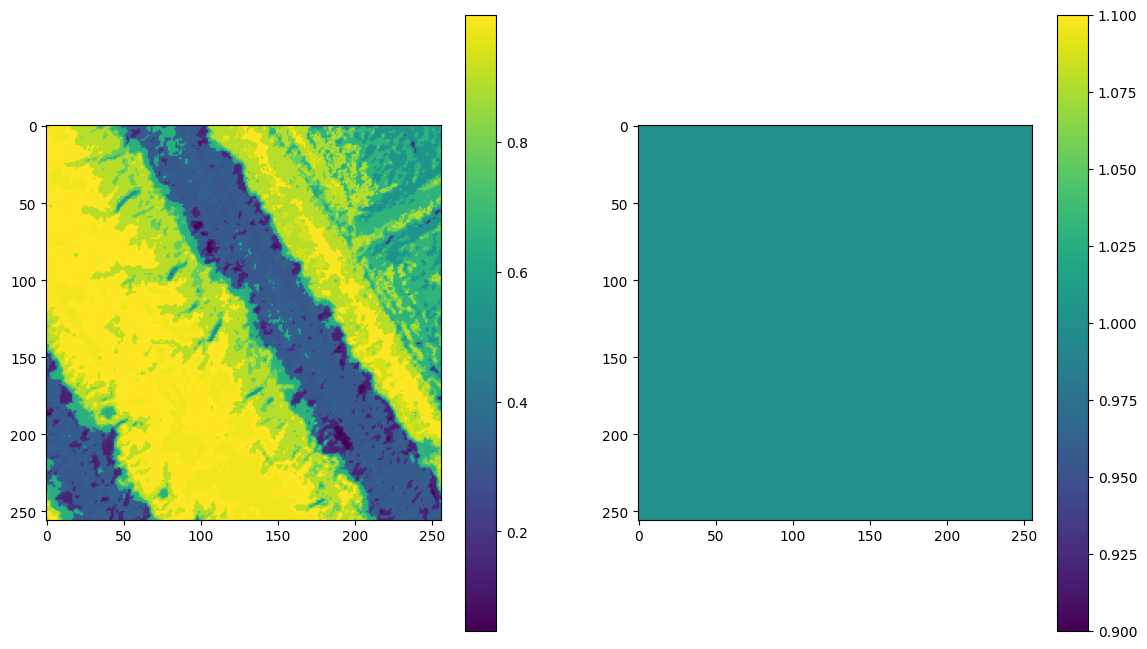

In [150]:
random_raster_id = random.randint(0, len(raster_dataset)-1)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(raster_dataset[random_raster_id], )
plt.colorbar()
plt.subplot(122)
plt.imshow(mask_dataset[random_raster_id])
plt.colorbar()

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(raster_dataset, mask_dataset, test_size=0.2, random_state=100)

In [153]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1186, 256, 256, 1)
(297, 256, 256, 1)
(1186, 256, 256, 1)
(297, 256, 256, 1)


In [154]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = 1
total_classes = 2

In [155]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
1
2


# Coding for Part 2: Deep Learning with U-net model


In [ ]:
!pip install -U segmentation-models
#pip install keras==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K
from keras import layers
import tensorflow as tf

In [ ]:
# def jaccard_coef(y_true, y_pred):
#   #y_true_flatten = K.flatten(y_true)
#   #y_pred_flatten = K.flatten(y_pred)
#   y_true_flatten = tf.reshape(y_true, [-1])
#   y_pred_flatten = tf.reshape(y_pred, [-1])
#   intersection = K.sum(y_true_flatten * y_pred_flatten)
#   final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
#   return final_coef_value


In [156]:
def jaccard_coef(y_true, y_pred):
    # Convertir les entrées en float32 pour assurer la compatibilité des types
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    y_true_flatten = tf.reshape(y_true, [-1])
    y_pred_flatten = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection + 1.0)

    return final_coef_value

In [ ]:
#from tensorflow.keras.optimizers import Adam

def unet_binary_segmentation(
    image_height=px,
    image_width=px,
    image_channels=1,
    base_filters=64,
    dropout_rate=0.3
):
    """
    U-Net model optimized for binary segmentation of large images

    Parameters:
    - image_height: Height of input images (default 1024)
    - image_width: Width of input images (default 1024)
    - image_channels: Number of image channels (default 1)
    - base_filters: Base number of convolution filters (default 64)
    - dropout_rate: Dropout rate for regularization (default 0.3)

    Returns:
    - Compiled Keras model for binary segmentation
    """
    inputs = Input((image_height, image_width, image_channels))

    # Encoder (Downsampling)
    # Première couche
    c1 = Conv2D(base_filters, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(dropout_rate)(c1)
    c1 = Conv2D(base_filters, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2,2))(c1)

    # Deuxième couche
    c2 = Conv2D(base_filters*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(dropout_rate)(c2)
    c2 = Conv2D(base_filters*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2,2))(c2)

    # Troisième couche
    c3 = Conv2D(base_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(dropout_rate)(c3)
    c3 = Conv2D(base_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2,2))(c3)

    # Couche centrale (bottleneck)
    c4 = Conv2D(base_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(dropout_rate)(c4)
    c4 = Conv2D(base_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    c4 = BatchNormalization()(c4)

    # Decoder (Upsampling)
    # Première couche de décodage
    u5 = Conv2DTranspose(base_filters*4, (2,2), strides=(2,2), padding='same')(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(base_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(dropout_rate)(c5)
    c5 = Conv2D(base_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    c5 = BatchNormalization()(c5)

    # Deuxième couche de décodage
    u6 = Conv2DTranspose(base_filters*2, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(base_filters*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(dropout_rate)(c6)
    c6 = Conv2D(base_filters*2, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    c6 = BatchNormalization()(c6)

    # Troisième couche de décodage
    u7 = Conv2DTranspose(base_filters, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(base_filters, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(dropout_rate)(c7)
    c7 = Conv2D(base_filters, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    c7 = BatchNormalization()(c7)

    # Couche de sortie pour la segmentation binaire
    outputs = Conv2D(1, (1,1), activation='sigmoid')(c7)

    # Création du modèle
    model = Model(inputs=[inputs], outputs=[outputs])

    # Compilation du modèle
    #model.compile(
    #   optimizer=Adam(learning_rate=1e-4),
    #    loss='binary_crossentropy',
    #    metrics=['accuracy']
    #)

    return model

# Exemple d'utilisation
#model = unet_binary_segmentation()
#model.summary()

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [157]:
def get_deep_learning_model():
  return unet_binary_segmentation(
    image_height=px,
    image_width=px,
    image_channels=1,
    base_filters=64,
    dropout_rate=0.3
)


In [158]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
#model.get_config()

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [159]:
weights = [0.5, 0.5]

In [ ]:
#os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm


Segmentation Models: using `tf.keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.BinaryFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [162]:
import tensorflow as tf

In [163]:
tf.keras.backend.clear_session()


In [164]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [165]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64, 64, 256)    │          1,024 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 256)    │              0 │ batch_normalization_4… │
├──────────────────────

 Total params: 7,707,457 (29.40 MB)

 Trainable params: 7,701,825 (29.38 MB)

 Non-trainable params: 5,632 (22.00 KB)

# Visualize Model with Keras

In [ ]:
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

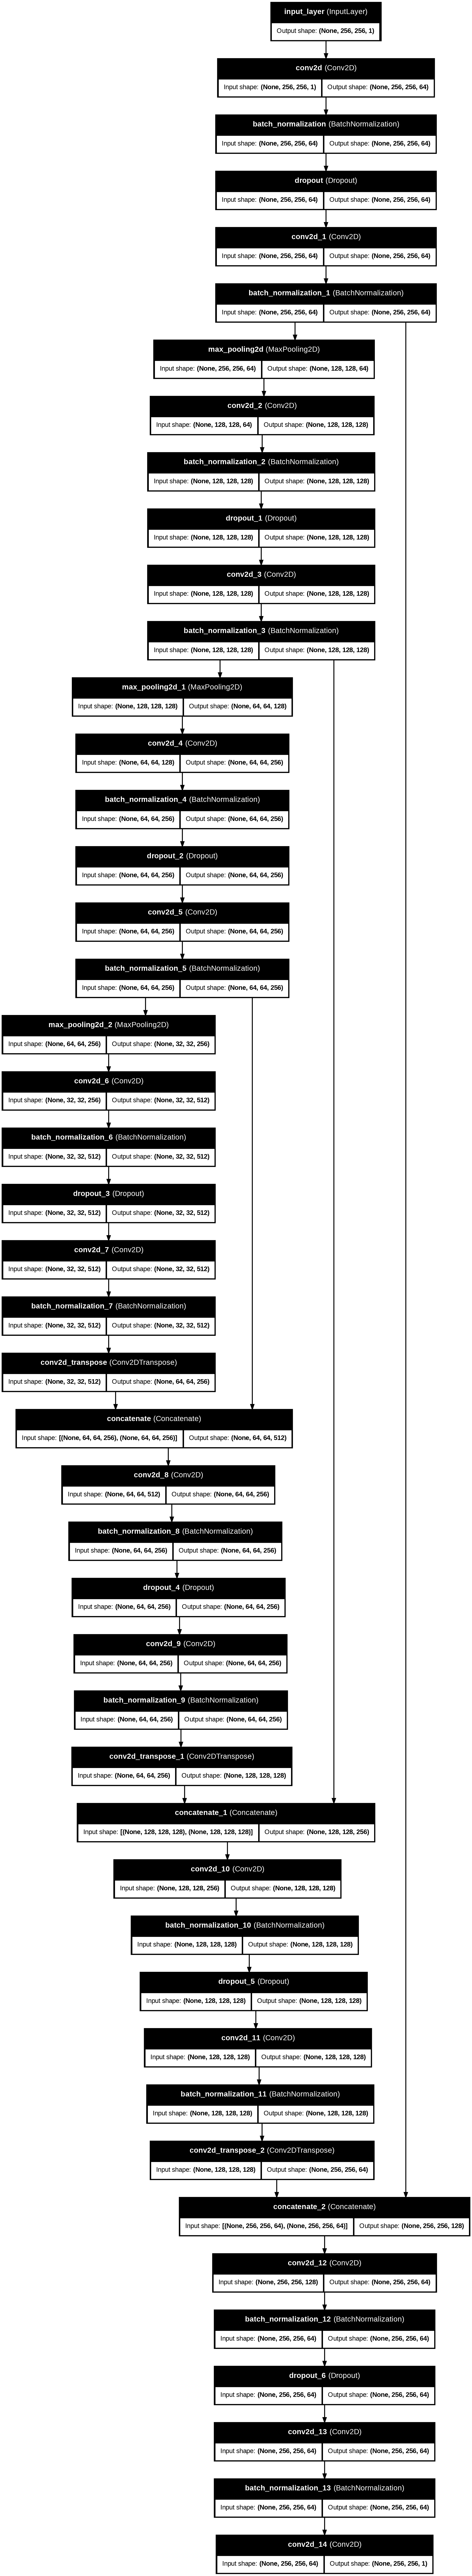

In [89]:
plot_model(model, to_file="GeoAIVision.png", show_shapes=True, show_layer_names=True)

In [ ]:
import keras
from IPython.display import clear_output

%matplotlib inline

In [ ]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()

In [ ]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()

<Figure size 1400x800 with 0 Axes>

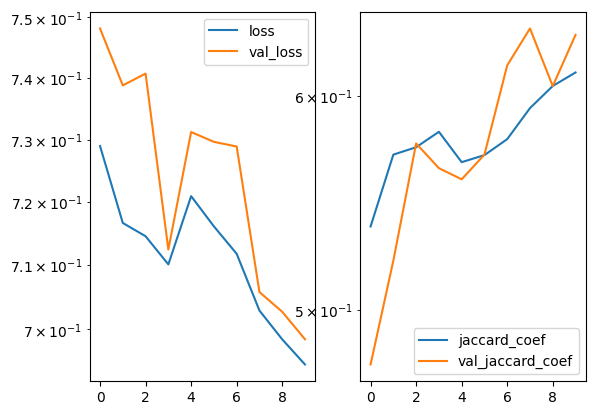

297/297 ━━━━━━━━━━━━━━━━━━━━ 29s 99ms/step - accuracy: 0.7709 - jaccard_coef: 0.6067 - loss: 0.6999 - val_accuracy: 0.7939 - val_jaccard_coef: 0.6317 - val_loss: 0.6985


In [166]:
num_epochs = 10
model_history = model.fit(X_train, y_train,
                          batch_size=4,
                          verbose=1,
                          epochs=num_epochs,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)


In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'accuracy': [0.7414823174476624,
  0.7884493470191956,
  0.7815712094306946,
  0.7775863409042358,
  0.7801599502563477,
  0.7849335074424744,
  0.7818616032600403,
  0.7905373573303223,
  0.793243408203125,
  0.7954553365707397],
 'jaccard_coef': [0.541580855846405,
  0.5714756846427917,
  0.5834182500839233,
  0.5926222205162048,
  0.5992194414138794,
  0.6067796945571899,
  0.612119197845459,
  0.6141510605812073,
  0.6250369548797607,
  0.6316751837730408],
 'loss': [0.7299244999885559,
  0.7169647216796875,
  0.7099891901016235,
  0.7053025364875793,
  0.7018176913261414,
  0.6978392601013184,
  0.6953234672546387,
  0.6949025392532349,
  0.688406229019165,
  0.6847730278968811],
 'val_accuracy': [0.73896723985672,
  0.7631357908248901,
  0.7614002823829651,
  0.7711526155471802,
  0.7728590369224548,
  0.7778104543685913,
  0.8025239109992981,
  0.7922594547271729,
  0.7990280985832214,
  0.8093463182449341],
 'val_jaccard_coef': [0.5696713328361511,
  0.6144892573356628,
  0.58

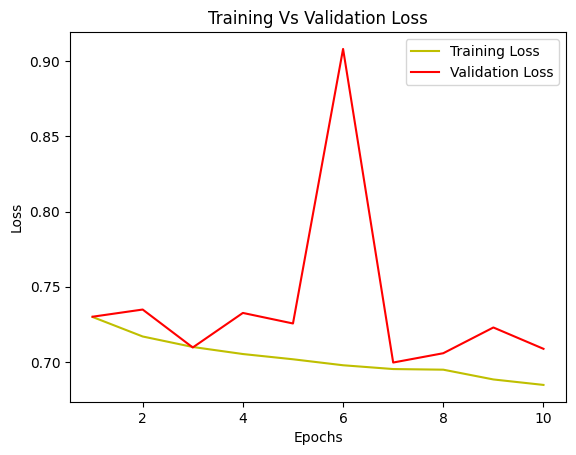

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

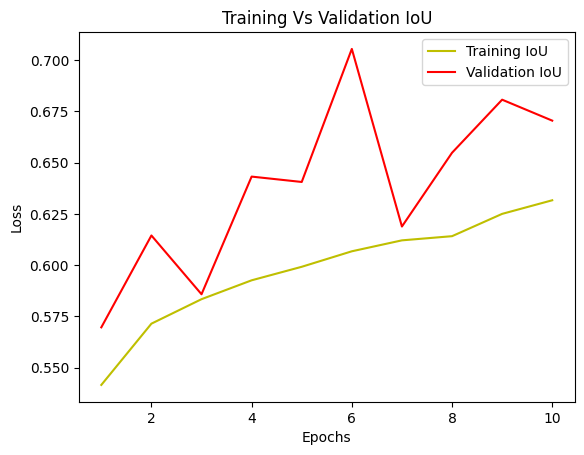

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 297}

In [167]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step


In [168]:
len(y_pred)
y_pred.shape


(297, 256, 256, 1)

In [169]:
y_pred

array([[[[0.68847096],
         [0.696088  ],
         [0.71506464],
         ...,
         [0.6177212 ],
         [0.6228777 ],
         [0.6480783 ]],

        [[0.7000516 ],
         [0.71502256],
         [0.75659305],
         ...,
         [0.5804546 ],
         [0.6037993 ],
         [0.61930245]],

        [[0.71070194],
         [0.7417607 ],
         [0.7762733 ],
         ...,
         [0.57540065],
         [0.5856893 ],
         [0.62339234]],

        ...,

        [[0.74021983],
         [0.76124364],
         [0.79801995],
         ...,
         [0.7479623 ],
         [0.7194378 ],
         [0.6856461 ]],

        [[0.7064268 ],
         [0.74209934],
         [0.7628598 ],
         ...,
         [0.72282463],
         [0.68642926],
         [0.6729027 ]],

        [[0.6997383 ],
         [0.70843375],
         [0.73549795],
         ...,
         [0.6963592 ],
         [0.6905686 ],
         [0.67674184]]],


       [[[0.6898413 ],
         [0.6996595 ],
         [0.71

In [170]:
y_pred_argmax =  (y_pred >= 0.5).astype(np.uint8)

In [171]:
len(y_pred_argmax)
y_pred_argmax.shape
# y_pred_argmax = y_pred_argmax.squeeze(axis=-1)
# y_pred_argmax.shape

(297, 256, 256, 1)

In [172]:
y_pred_argmax

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],


In [173]:
y_test_argmax = (y_test >= 0.5).astype(np.uint8)

In [174]:
y_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random


In [234]:
test_image_number = random.randint(0, len(X_test)-1)

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

#prediction = model.predict(test_image_input)
prediction = model.predict(test_image_input)
# predicted_image = np.argmax(prediction, axis=3)
# predicted_image.shape
# predicted_image = predicted_image[0,:,:]
predicted_image = (prediction[0, :, :, 0] > 0.5).astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [204]:
prediction.shape

(1, 256, 256, 1)

False
False


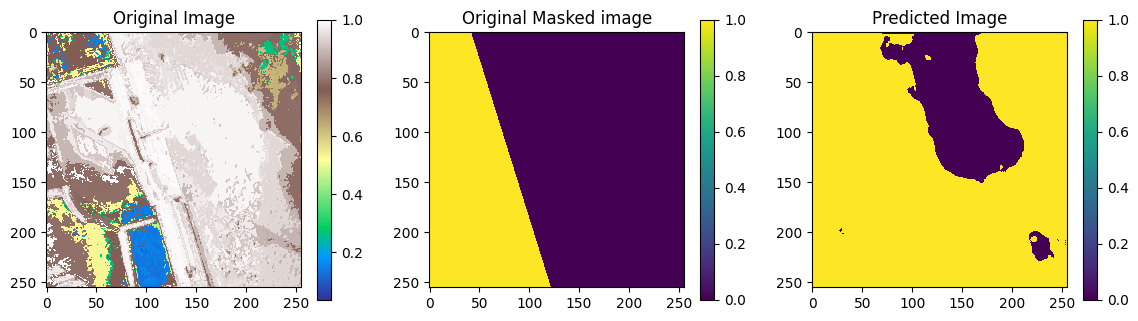

In [235]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image, cmap='terrain')
plt.colorbar()
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image, )
plt.colorbar()
print(np.all(ground_truth_image == 0))
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image, )
plt.colorbar()
print(np.all(predicted_image == 0))


# Model saving and reloading (with custom loss and custom metrics)

- loss
  - 'dice_loss_plus_1focal_loss': total_loss
- Metrics
  - jaccard_coef: jaccard_coef

In [243]:
model.save("/content/drive/MyDrive/Colab Notebooks/GeoAIVision_trained_model.h5")

In [80]:
!ls -lah

total 1.4M
drwxr-xr-x 1 root root 4.0K Dec  6 10:51 .
drwxr-xr-x 1 root root 4.0K Dec  6 09:55 ..
drwxr-xr-x 4 root root 4.0K Dec  4 14:23 .config
drwx------ 6 root root 4.0K Dec  6 10:22 drive
drwxr-xr-x 1 root root 4.0K Dec  4 14:23 sample_data
-rw-r--r-- 1 root root 1.4M Dec  6 10:27 satellite_model_plot.png
drwxr-xr-x 8 root root 4.0K Dec  6 11:12 wandb


In [81]:
from keras.models import load_model

In [88]:
saved_model = load_model('/content/GeOAIVision.h5',
                         custom_objects=({'dice_loss_plus_1binary_focal_loss': total_loss,
                                          'jaccard_coef': jaccard_coef}))

In [90]:
model.loss.name

'dice_loss_plus_1binary_focal_loss'

In [ ]:
#saved_model.get_config()